# Shopping Trends Data Analysis

**Objective**: To analyze historical shopping data to identify patterns and trends that will help optimize inventory management and tailor marketing strategies. The insights gained will be used to improve sales forecasting, enhance customer satisfaction, and increase overall business efficiency. Additionally, data on the type of items purchased, shopping frequency, preferred shopping seasons, and interactions with promotional offers is included. With a collection of 3900 records, this dataset serves as a foundation for businesses.
<br>In the context of customer shopping trends data, EDA can provide valuable insights into customer behaviour,helping businesses make informed decisions to improve products, marketing strategies, and overall customer experience.

## _Importing Libraries and Datasets_

In [7]:
import numpy as np# linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [9]:
#read_csv loads the data
data=pd.read_csv("shopping_trends.csv")

In [316]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
776,777,49,Male,Shirt,Clothing,60,Alabama,M,Maroon,Spring,5.0,Yes,PayPal,Standard,Yes,Yes,8,Venmo,Every 3 Months
556,557,40,Male,Coat,Outerwear,90,Montana,L,Indigo,Winter,5.0,Yes,Credit Card,Store Pickup,Yes,Yes,21,Cash,Fortnightly
2888,2889,70,Female,Hoodie,Clothing,42,Wisconsin,L,Green,Spring,5.0,No,Venmo,2-Day Shipping,No,No,25,Debit Card,Quarterly
1486,1487,25,Male,Sneakers,Footwear,73,Idaho,S,Yellow,Spring,5.0,No,Cash,Free Shipping,Yes,Yes,23,Venmo,Every 3 Months
660,661,50,Male,Coat,Outerwear,79,Montana,M,Olive,Fall,5.0,Yes,Debit Card,2-Day Shipping,Yes,Yes,39,Credit Card,Quarterly


### Overview of data

In [11]:
#summary of the DataFrame, including the index dtype and column dtypes, non-null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [13]:
#computes summary of descriptive statistical measures pertaining to the DataFrame columns.
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
#we can know the dimension of the dataset 
data.shape

(3900, 19)

#### Data Cleaning

In [15]:
#let's check if there are any null values in the dataset
data.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [21]:
data.duplicated().sum()

0

## *_Exploratory Data Analysis_*

#### Distribution of age

In [23]:
#returns the available columns in dataset
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

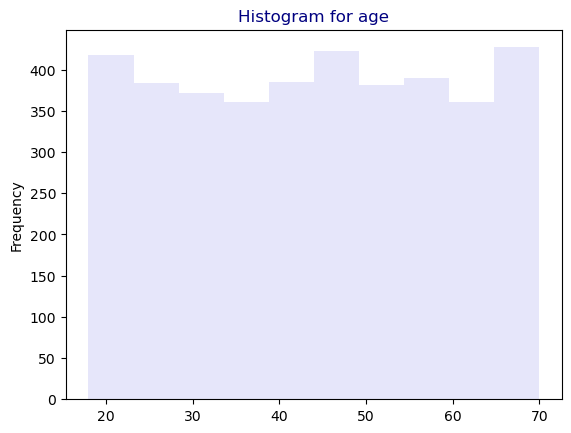

In [48]:
data['Age'].plot(kind="hist",color='Lavender')
plt.title("Histogram for age",color='Navy')
plt.show()

The distribution appears somewhat uniform, meaning that the age values are relatively evenly distributed across the different ranges.

#### Gender Distribution

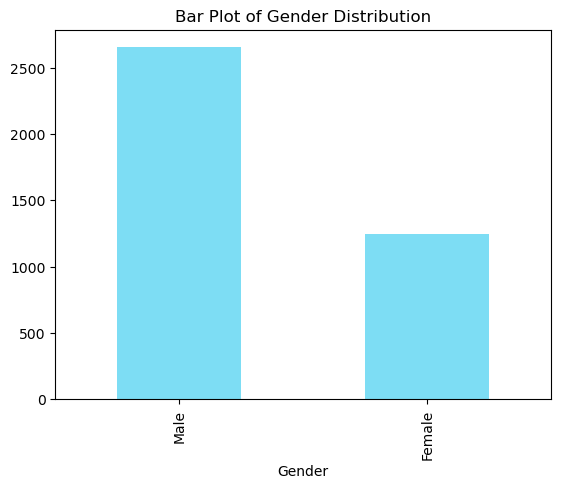

In [258]:
data['Gender'].value_counts().plot(kind="bar",color="#7DDDF4")
plt.title("Bar Plot of Gender Distribution")
plt.show()

The number of Male are larger than Female .

#### Distribution by Category 

In [327]:
data.groupby("Category")['Purchase Amount (USD)'].mean().sort_values(ascending=False)


Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

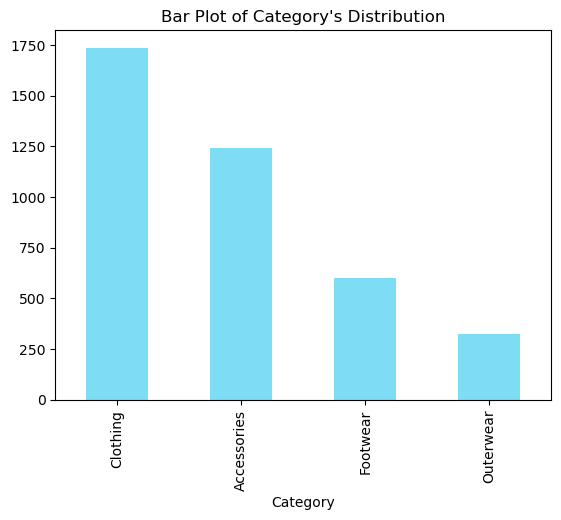

In [331]:
data['Category'].value_counts().plot(kind="bar",color="#7DDDF4")
plt.title("Bar Plot of Category's Distribution")
plt.show()

Clothing category have highest Purchase amount.

#### Sort By Review Rating

In [80]:
data.sort_values('Review Rating',ascending=False,inplace=True)

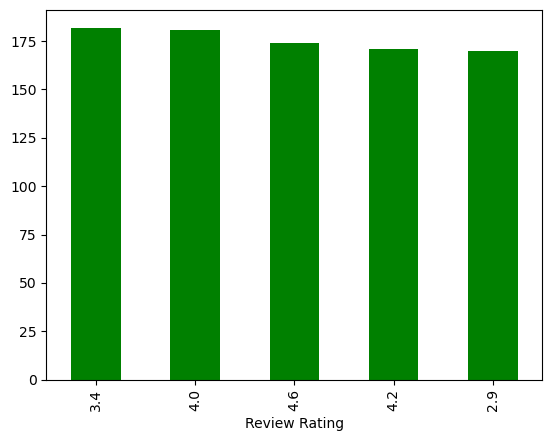

In [343]:
data["Review Rating"].value_counts().head(5).plot(kind="bar",color="green")
plt.show()

The average is about 3.5 to 4.0

In [337]:
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
776,777,49,Male,Shirt,Clothing,60,Alabama,M,Maroon,Spring,5.0,Yes,PayPal,Standard,Yes,Yes,8,Venmo,Every 3 Months
556,557,40,Male,Coat,Outerwear,90,Montana,L,Indigo,Winter,5.0,Yes,Credit Card,Store Pickup,Yes,Yes,21,Cash,Fortnightly
2888,2889,70,Female,Hoodie,Clothing,42,Wisconsin,L,Green,Spring,5.0,No,Venmo,2-Day Shipping,No,No,25,Debit Card,Quarterly
1486,1487,25,Male,Sneakers,Footwear,73,Idaho,S,Yellow,Spring,5.0,No,Cash,Free Shipping,Yes,Yes,23,Venmo,Every 3 Months
660,661,50,Male,Coat,Outerwear,79,Montana,M,Olive,Fall,5.0,Yes,Debit Card,2-Day Shipping,Yes,Yes,39,Credit Card,Quarterly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,483,41,Male,Belt,Accessories,42,Connecticut,M,Yellow,Winter,2.5,Yes,PayPal,2-Day Shipping,Yes,Yes,11,Venmo,Annually
835,836,35,Male,Boots,Footwear,26,Maryland,L,Indigo,Summer,2.5,Yes,Debit Card,Next Day Air,Yes,Yes,21,Debit Card,Weekly
2491,2492,63,Male,Handbag,Accessories,47,North Carolina,M,Magenta,Spring,2.5,No,Debit Card,Express,No,No,15,Bank Transfer,Monthly
3230,3231,49,Female,Sneakers,Footwear,49,Kansas,M,Olive,Summer,2.5,No,Venmo,Next Day Air,No,No,38,Debit Card,Annually


#### Subscription Stattus

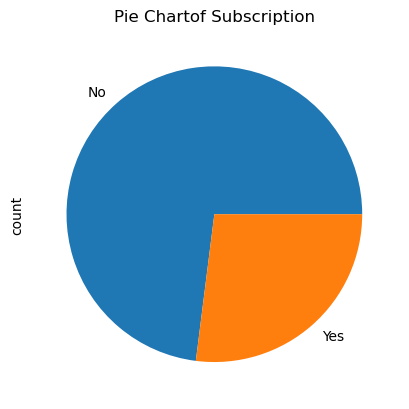

In [94]:
data['Subscription Status'].value_counts().plot(kind="pie")
plt.title("Pie Chartof Subscription",)
plt.show()

Maximum people do not have subscription

<Axes: ylabel='count'>

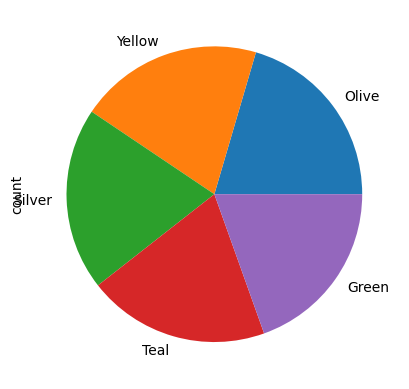

In [102]:
data["Color"].value_counts().head(5).plot(kind="pie")

Olive color have higher purchase.

#### Previous purchases against review ratings

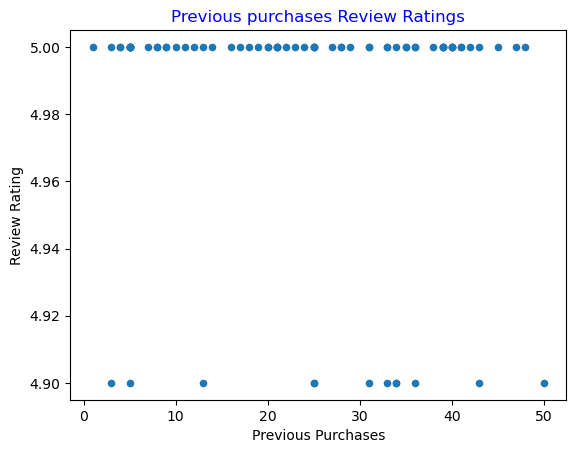

In [122]:
data.head(80).plot(x='Previous Purchases',y='Review Rating',kind="scatter")
plt.title("Previous purchases Review Ratings",color="blue")
plt.show()

Previous purchases Review Ratings are more likely to be 5.0.

#### Purchase Amount based in Frequency of purchases

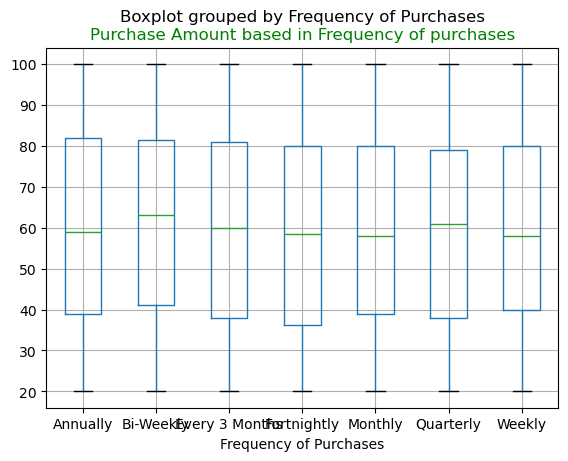

In [128]:
data.boxplot(column="Purchase Amount (USD)",by="Frequency of Purchases")
plt.title("Purchase Amount based in Frequency of purchases",color="green")
plt.show()

Purchase amount is high on shopping Annually.

#### Value count for preffered payment method

In [363]:
data["Preferred Payment Method"].value_counts().sort_values(ascending=False).tail()

Preferred Payment Method
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

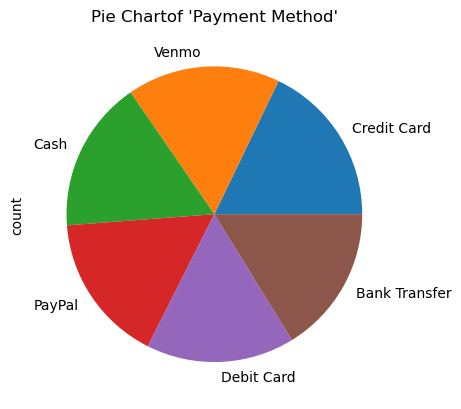

In [132]:
data["Payment Method"].value_counts().plot(kind="pie")
plt.title("Pie Chartof 'Payment Method'",)
plt.show()

Almost all kind of payment methods are used equally.

Credit card is highly preferred Payment Methods.

#### Pivot table for location and item purchased

In [156]:
pd.pivot_table(data,values="Purchase Amount (USD)",index="Location",columns="Item Purchased",aggfunc="mean").head()

## colums=items;row=locations;cells=dollar values:

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,74.0,26.500000,52.0,73.666667,54.500000,55.200000,85.000000,57.666667,76.000000,53.000000,...,75.333333,48.2,54.333333,49.000000,68.666667,79.500000,93.50,62.666667,40.500000,52.50
Alaska,74.6,76.750000,67.5,56.000000,45.500000,74.500000,66.333333,46.000000,52.666667,56.500000,...,45.000000,59.5,80.000000,76.666667,87.333333,73.333333,74.25,83.000000,50.333333,56.75
Arizona,48.6,84.500000,61.0,NaN,65.333333,71.000000,87.000000,58.666667,87.000000,66.666667,...,53.500000,80.0,87.000000,46.000000,68.500000,78.500000,61.00,66.000000,70.400000,62.00
Arkansas,90.0,55.000000,66.0,50.000000,54.250000,62.800000,64.333333,50.000000,35.000000,55.250000,...,67.500000,59.0,59.500000,95.000000,44.500000,69.000000,60.50,56.000000,71.500000,52.00
California,57.4,61.666667,39.5,62.500000,55.000000,58.428571,53.000000,65.250000,49.000000,56.000000,...,54.500000,42.8,NaN,63.333333,56.000000,73.000000,83.00,69.400000,42.000000,69.00


In [370]:
data.groupby("Size")["Purchase Amount (USD)"].mean()


Size
L     58.563153
M     59.924217
S     61.037707
XL    60.090909
Name: Purchase Amount (USD), dtype: float64

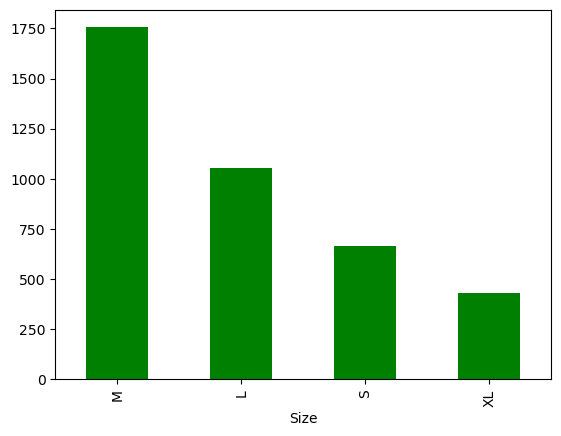

In [372]:
data["Size"].value_counts().head(5).plot(kind="bar",color="green")
plt.show()

Medium size is having high Purchased Amount

In [160]:
data.groupby("Payment Method")["Purchase Amount (USD)"].sum()

Payment Method
Bank Transfer    37123
Cash             38833
Credit Card      42567
Debit Card       37118
PayPal           37449
Venmo            39991
Name: Purchase Amount (USD), dtype: int64

#### Discount applied

In [172]:
data.groupby("Discount Applied")["Review Rating"].mean()

Discount Applied
No     3.757715
Yes    3.739654
Name: Review Rating, dtype: float64

In [174]:
data.groupby("Color")["Category"].value_counts()

Color   Category   
Beige   Clothing       65
        Accessories    44
        Footwear       24
        Outerwear      14
Black   Clothing       81
                       ..
White   Outerwear      15
Yellow  Clothing       75
        Accessories    56
        Footwear       30
        Outerwear      13
Name: count, Length: 100, dtype: int64

In [178]:
 data.groupby("Frequency of Purchases")["Previous Purchases"].median()

Frequency of Purchases
Annually          24.0
Bi-Weekly         24.0
Every 3 Months    24.0
Fortnightly       26.0
Monthly           25.0
Quarterly         28.0
Weekly            26.0
Name: Previous Purchases, dtype: float64

In [354]:
data.groupby("Season")['Purchase Amount (USD)'].sum()

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64

In [184]:
 data.groupby("Season")["Review Rating"].mean()

Season
Fall      3.729949
Spring    3.790591
Summer    3.725654
Winter    3.752111
Name: Review Rating, dtype: float64

#### Count of purchases in each seasons

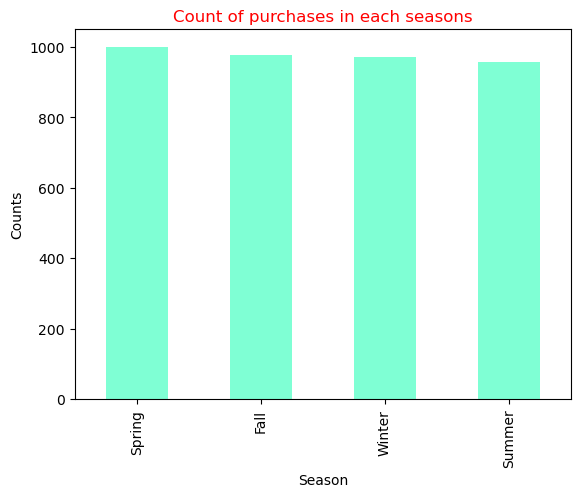

In [256]:
data["Season"].value_counts().plot(kind="bar",color="#7FFFD4")
plt.xlabel("Season")
plt.ylabel("Counts")
plt.title("Count of purchases in each seasons",color='red')
plt.show()

Every season contributes equal distribution.

#### Distribution of purchase by Category

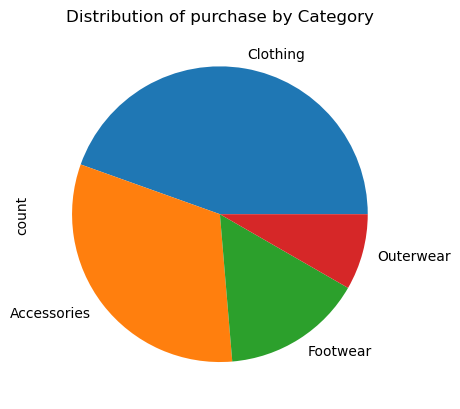

In [224]:
data["Category"].value_counts().plot(kind="pie")
plt.title("Distribution of purchase by Category")
plt.show()

Category is maximum at clothing and minimum at outerwear

#### Review Rating Distribution by Gender

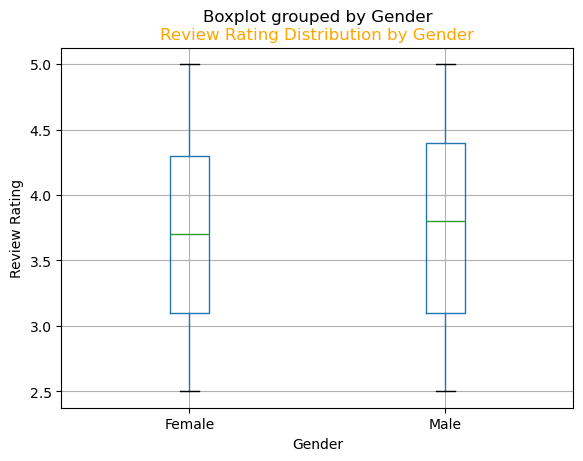

In [234]:
data.boxplot(column="Review Rating",by="Gender")
plt.xlabel("Gender")
plt.ylabel("Review Rating")
plt.title("Review Rating Distribution by Gender",color="orange")
plt.show()

Male customers are likely to give more ratings in comparison to female

#### Purchase Amount Distribution

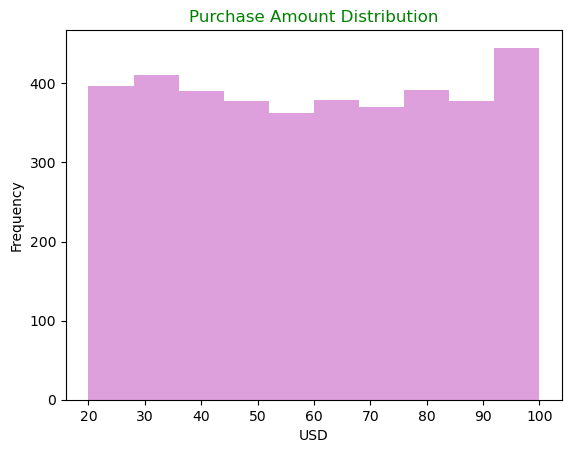

In [254]:
data["Purchase Amount (USD)"].plot(kind="hist",bins=10,color="#DDA0DD")
plt.xlabel("USD")
plt.ylabel("Frequency")
plt.title("Purchase Amount Distribution",color="green")
plt.show()

#### Mean Review Rating for Each Color

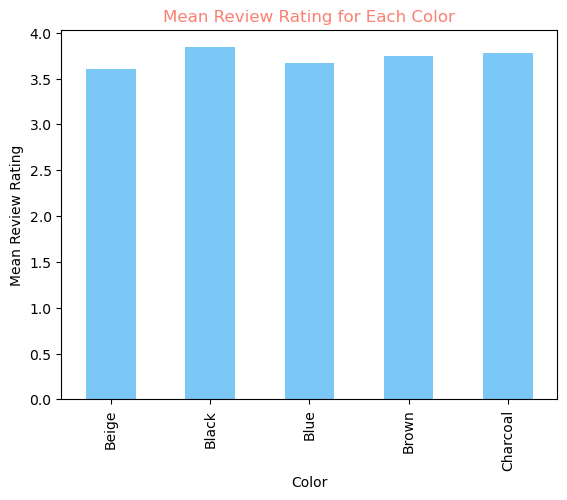

In [260]:
data.groupby("Color")["Review Rating"].mean().head().plot(kind="bar",color="#7BC8F6")
plt.xlabel("Color")
plt.ylabel("Mean Review Rating")
plt.title("Mean Review Rating for Each Color",color="#FA8072")
plt.show()

Black Colour have high review rating

#### Purchase Amount Distribution by Frequency

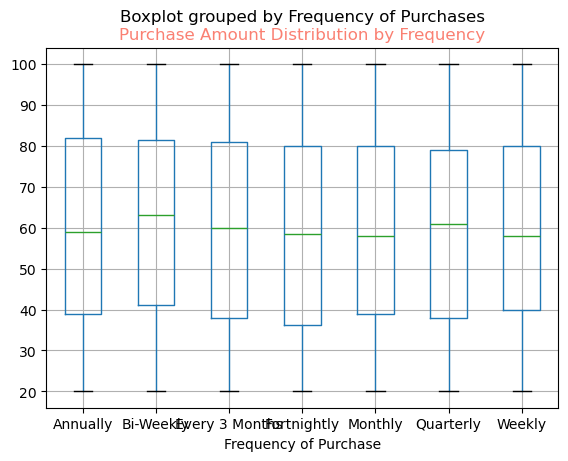

In [292]:
data.boxplot(column="Purchase Amount (USD)",by="Frequency of Purchases")
plt.xlabel("Frequency of Purchase")

plt.title("Purchase Amount Distribution by Frequency",color="#FA8072")
plt.show()

#### Sum of Purchase Amount by Payment Method

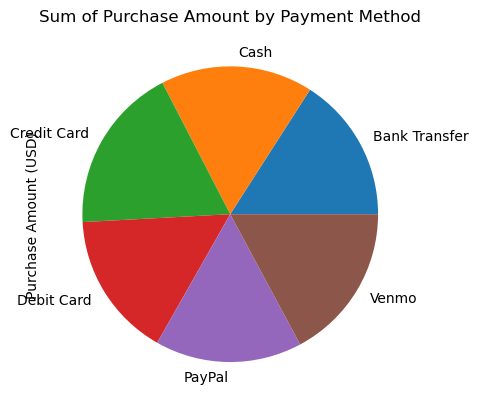

In [276]:
data.groupby("Payment Method")["Purchase Amount (USD)"].sum().plot(kind="pie")
plt.title("Sum of Purchase Amount by Payment Method")
plt.show()

#### Sum of Purchase Amount by Season

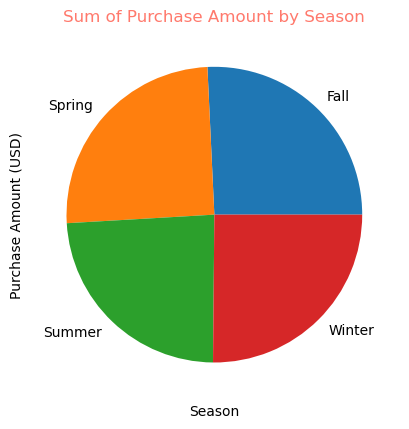

In [396]:
data.groupby("Season")["Purchase Amount (USD)"].sum().plot(kind="pie")
plt.xlabel("Season")
plt.title("Sum of Purchase Amount by Season",color="#FF796C")
plt.show()

Sum of purchase is more in spring.

## Problem Statements

**What is the distribution of customer ages in the dataset?**

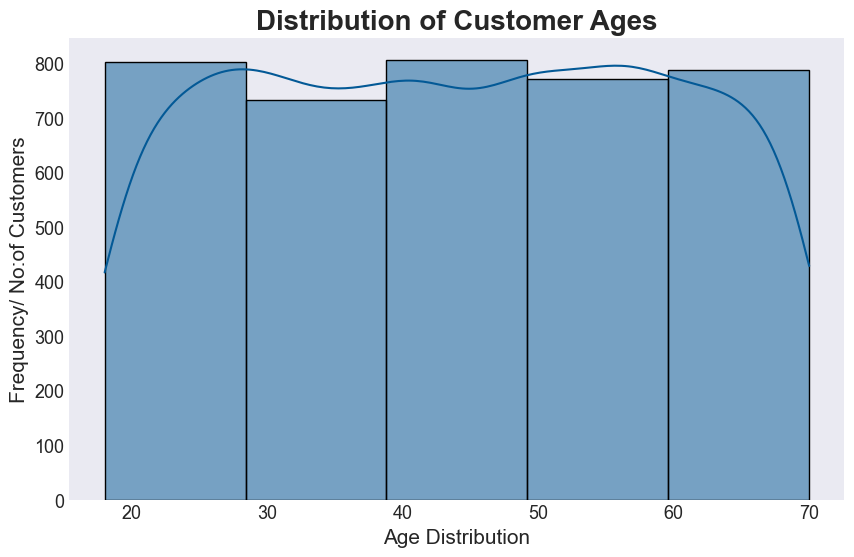

In [11]:
plt.figure(figsize = (10,6))
plt.style.use('seaborn-v0_8-dark')
hist = sns.histplot(data['Age'],bins = 5,color = '#035996',kde = True)
plt.xlabel('Age Distribution',fontdict = {'fontsize':15})
hist.tick_params(labelsize = 13)
plt.ylabel('Frequency/ No:of Customers',fontdict = {'fontsize':15})
plt.title('Distribution of Customer Ages',fontdict = {'fontsize':20,'weight':'bold'})
plt.show()

**Interpretation**

From the above frequency distribution graph we can interpret that customers in the age groups of 20-30 years and 40-50 years are shopping more frequently as compared to ages groups ranging from 18 years to 70 years.

**What is the purchase amount among various item categories?**

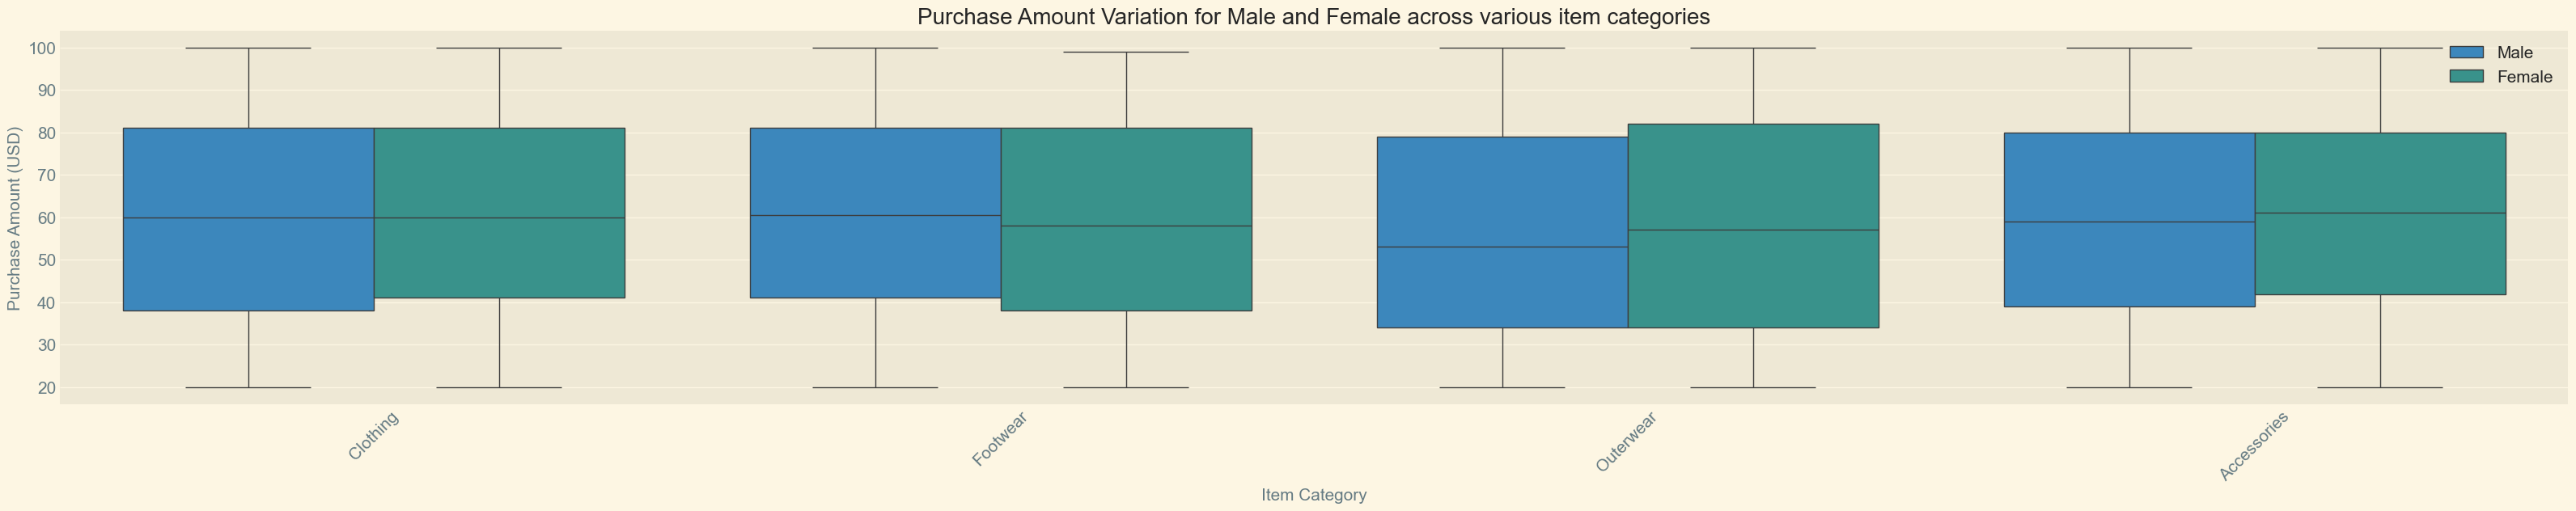

In [15]:
plt.style.use('Solarize_Light2')
plt.figure(figsize = (40,6))
sns.boxplot(data = data,x = 'Category',y = 'Purchase Amount (USD)',hue= 'Gender')
plt.title('Purchase Amount Variation for Male and Female across various item categories',fontsize = 20)
plt.xlabel('Item Category',fontsize = 15)
plt.ylabel('Purchase Amount (USD)',fontsize = 15)
plt.legend(loc = 'upper right',fontsize = 15)
plt.xticks(rotation = 45,fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

**Interpretation**

The boxplot generated illustrates the variation in purchase amounts across different item categories for female and male.

The median purchase amount is equal for male and female in the case of clothing category. For footwear category male has slightly higher median amount than female. Whereas in the categories of outerwear and accessories female have higher median purhcase amount than male.
There are no individual points means there are no outliers.
Also there is no great variability in purchase amounts for various categories.

**Interpretation**<br> There are only 27% of customers with subscription. As per the above combo chart we can infer that there is no significant relationship between the subscription status and purchases frequency. Customers with no subscription have made more frequent purchases are as compared to the subscribed customers.

**What are the top 10 locations based on the Purchase Amount?**

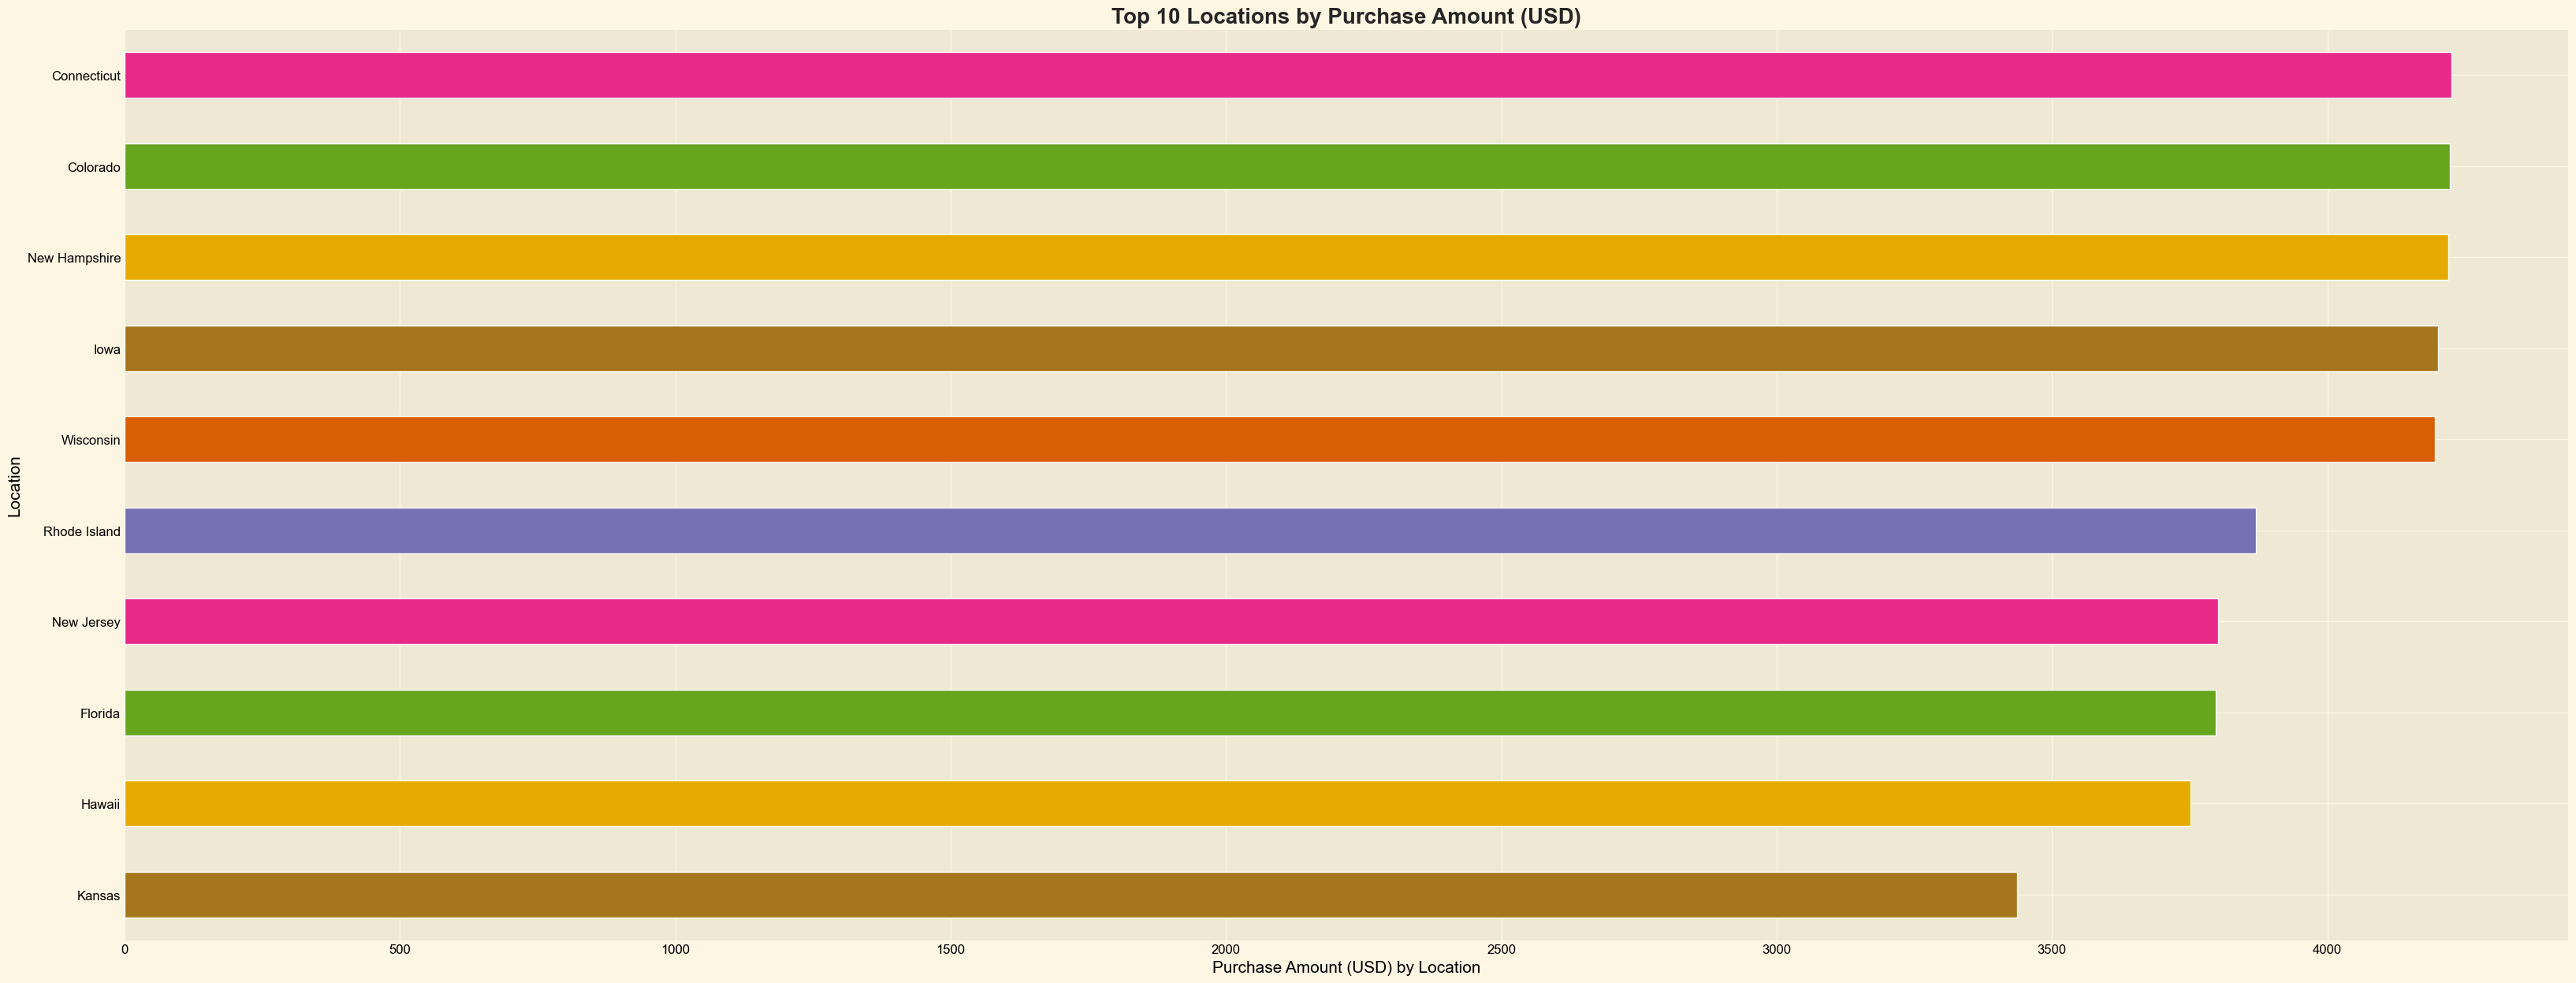

In [23]:
prominent_locations = data.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending = True)[:10]
plt.figure(figsize = (40,15))
bars = prominent_locations.plot(kind = 'barh',color = sns.color_palette('Dark2_r'),edgecolor = 'white')
plt.ylabel('Location',fontsize = 15,color = "black")
plt.xlabel('Purchase Amount (USD) by Location',fontsize = 15,color = "black")
plt.yticks(fontsize = 12,color = 'black')
plt.xticks(ha = 'center',fontsize = 12,color = 'black')
plt.title('Top 10 Locations by Purchase Amount (USD)',fontsize = 20,weight = 'bold')
plt.show()

**Interpretation**

From the above graph we can see the Top 10 locations that contribute the highest sales.

### Summary of Shopping Trend Analysis

This shopping trend analysis project aims to uncover key insights into customer purchasing behaviors and preferences, allowing for data-driven decision-making in marketing and sales strategies. By examining various datasets, we identified significant trends, such as:

* The distribution appears somewhat uniform, meaning that the age values are relatively evenly distributed across the different ranges.
* Sum of purchase is more in spring.
* Black Colour have high review rating.
* Male customers are likely to give more ratings in comparison to female.
* Category is maximum at clothing and minimum at outerwear.
* Every season contributes equal distribution.
* Medium size is having high Purchased Amount.
* Credit card is highly preferred Payment Methods.
* Previous purchases Review Ratings are more likely to be 5.0.
* Cusustomers in the age groups of 20-30 years and 40-50 years are shopping more frequently as compared to ages groups ranging from 18 years to 70 year
* For footwear category male has slightly higher median amount than female.
* There are only 27% of customers with subscription
* In the categories of outerwear and accessories female have higher median purhcase amount than males.
